# TELECOM CUSTOMER CHURN

# Import Dataset

In [ ]:
#importing the required packages
import io
import pandas as pd
import numpy as np
#import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
import math
#import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
#modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# upload data
import pandas as pd
from google.colab import files
file = files.upload()

Saving Data Test.csv to Data Test.csv
Saving Data Train.csv to Data Train.csv


In [ ]:
# Load Data
train = pd.read_csv("Data Train.csv")
test = pd.read_csv("Data Test.csv")

## Identifikasi Data

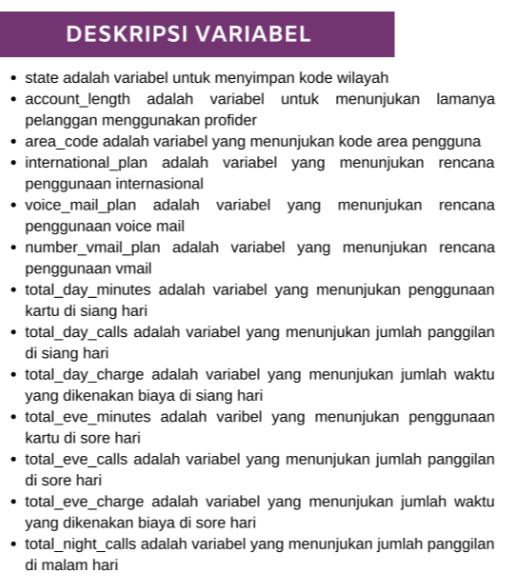

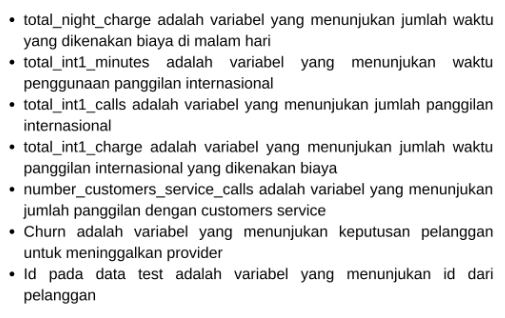

# Data Understanding

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
train.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


In [ ]:
train.shape

(4250, 20)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
# describe numerical
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Fungsi describe() digunakan untuk menampilkan insight dari data numerik ataupun kategorik, atau selain itu kita bisa membuat sebuah datframe baru menyesuaikan dengan kebutuhan terkait insight apa yang ingin ditelusuri dari data tersebut.

In [ ]:
print("Data Train Rows & Columns: ", train.shape)
print("Data Test Rows & Columns: ", test.shape)

Data Train Rows & Columns:  (4250, 20)
Data Test Rows & Columns:  (750, 20)



# **Exploratory data analysis**

EDA: identifikasi isi data, mengecek feature, mengecek info statistik deskriptif, visualisasi data

In [ ]:
# Analysis target prediciton
train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

### Categorical

In [ ]:
train.select_dtypes(exclude="number").head()

,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no


In [ ]:
train.describe(exclude="object")

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Numberic

In [ ]:
train.describe(include="number")

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#General data info
listItem = []
for col in train.columns :
  listItem.append([col,
                   train[col].dtype,
                   len(train),
                   train[col].isna().sum(),
                   round((train[col].isna().sum()/len (train[col])) * 100,2),
                   train[col].nunique(),
                   train[col].unique()])

dfDesc= pd.DataFrame(columns=['Column Name',
                              'Data Type',
                              'Data Count',
                              'Missing Value',
                              'Missing Value Percentage',
                              'Number of Unique',
                              'Unique'],
                     data=listItem)
dfDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique
0,state,object,4250,0,0.0,51,"[OH, NJ, OK, MA, MO, LA, WV, IN, RI, IA, MT, N..."
1,account_length,int64,4250,0,0.0,215,"[107, 137, 84, 75, 121, 147, 117, 141, 65, 74,..."
2,area_code,object,4250,0,0.0,3,"[area_code_415, area_code_408, area_code_510]"
3,international_plan,object,4250,0,0.0,2,"[no, yes]"
4,voice_mail_plan,object,4250,0,0.0,2,"[yes, no]"
5,number_vmail_messages,int64,4250,0,0.0,46,"[26, 0, 24, 37, 27, 33, 39, 25, 30, 41, 28, 34..."
6,total_day_minutes,float64,4250,0,0.0,1843,"[161.6, 243.4, 299.4, 166.7, 218.2, 157.0, 184..."
7,total_day_calls,int64,4250,0,0.0,120,"[123, 114, 71, 113, 88, 79, 97, 84, 137, 127, ..."
8,total_day_charge,float64,4250,0,0.0,1843,"[27.47, 41.38, 50.9, 28.34, 37.09, 26.69, 31.3..."
9,total_eve_minutes,float64,4250,0,0.0,1773,"[195.5, 121.2, 61.9, 148.3, 348.5, 103.1, 351...."


Tidak terdapat Missing Value serta Duplikat, sehingga tidak diperlukan data cleaning

# Visualization Simple Plot

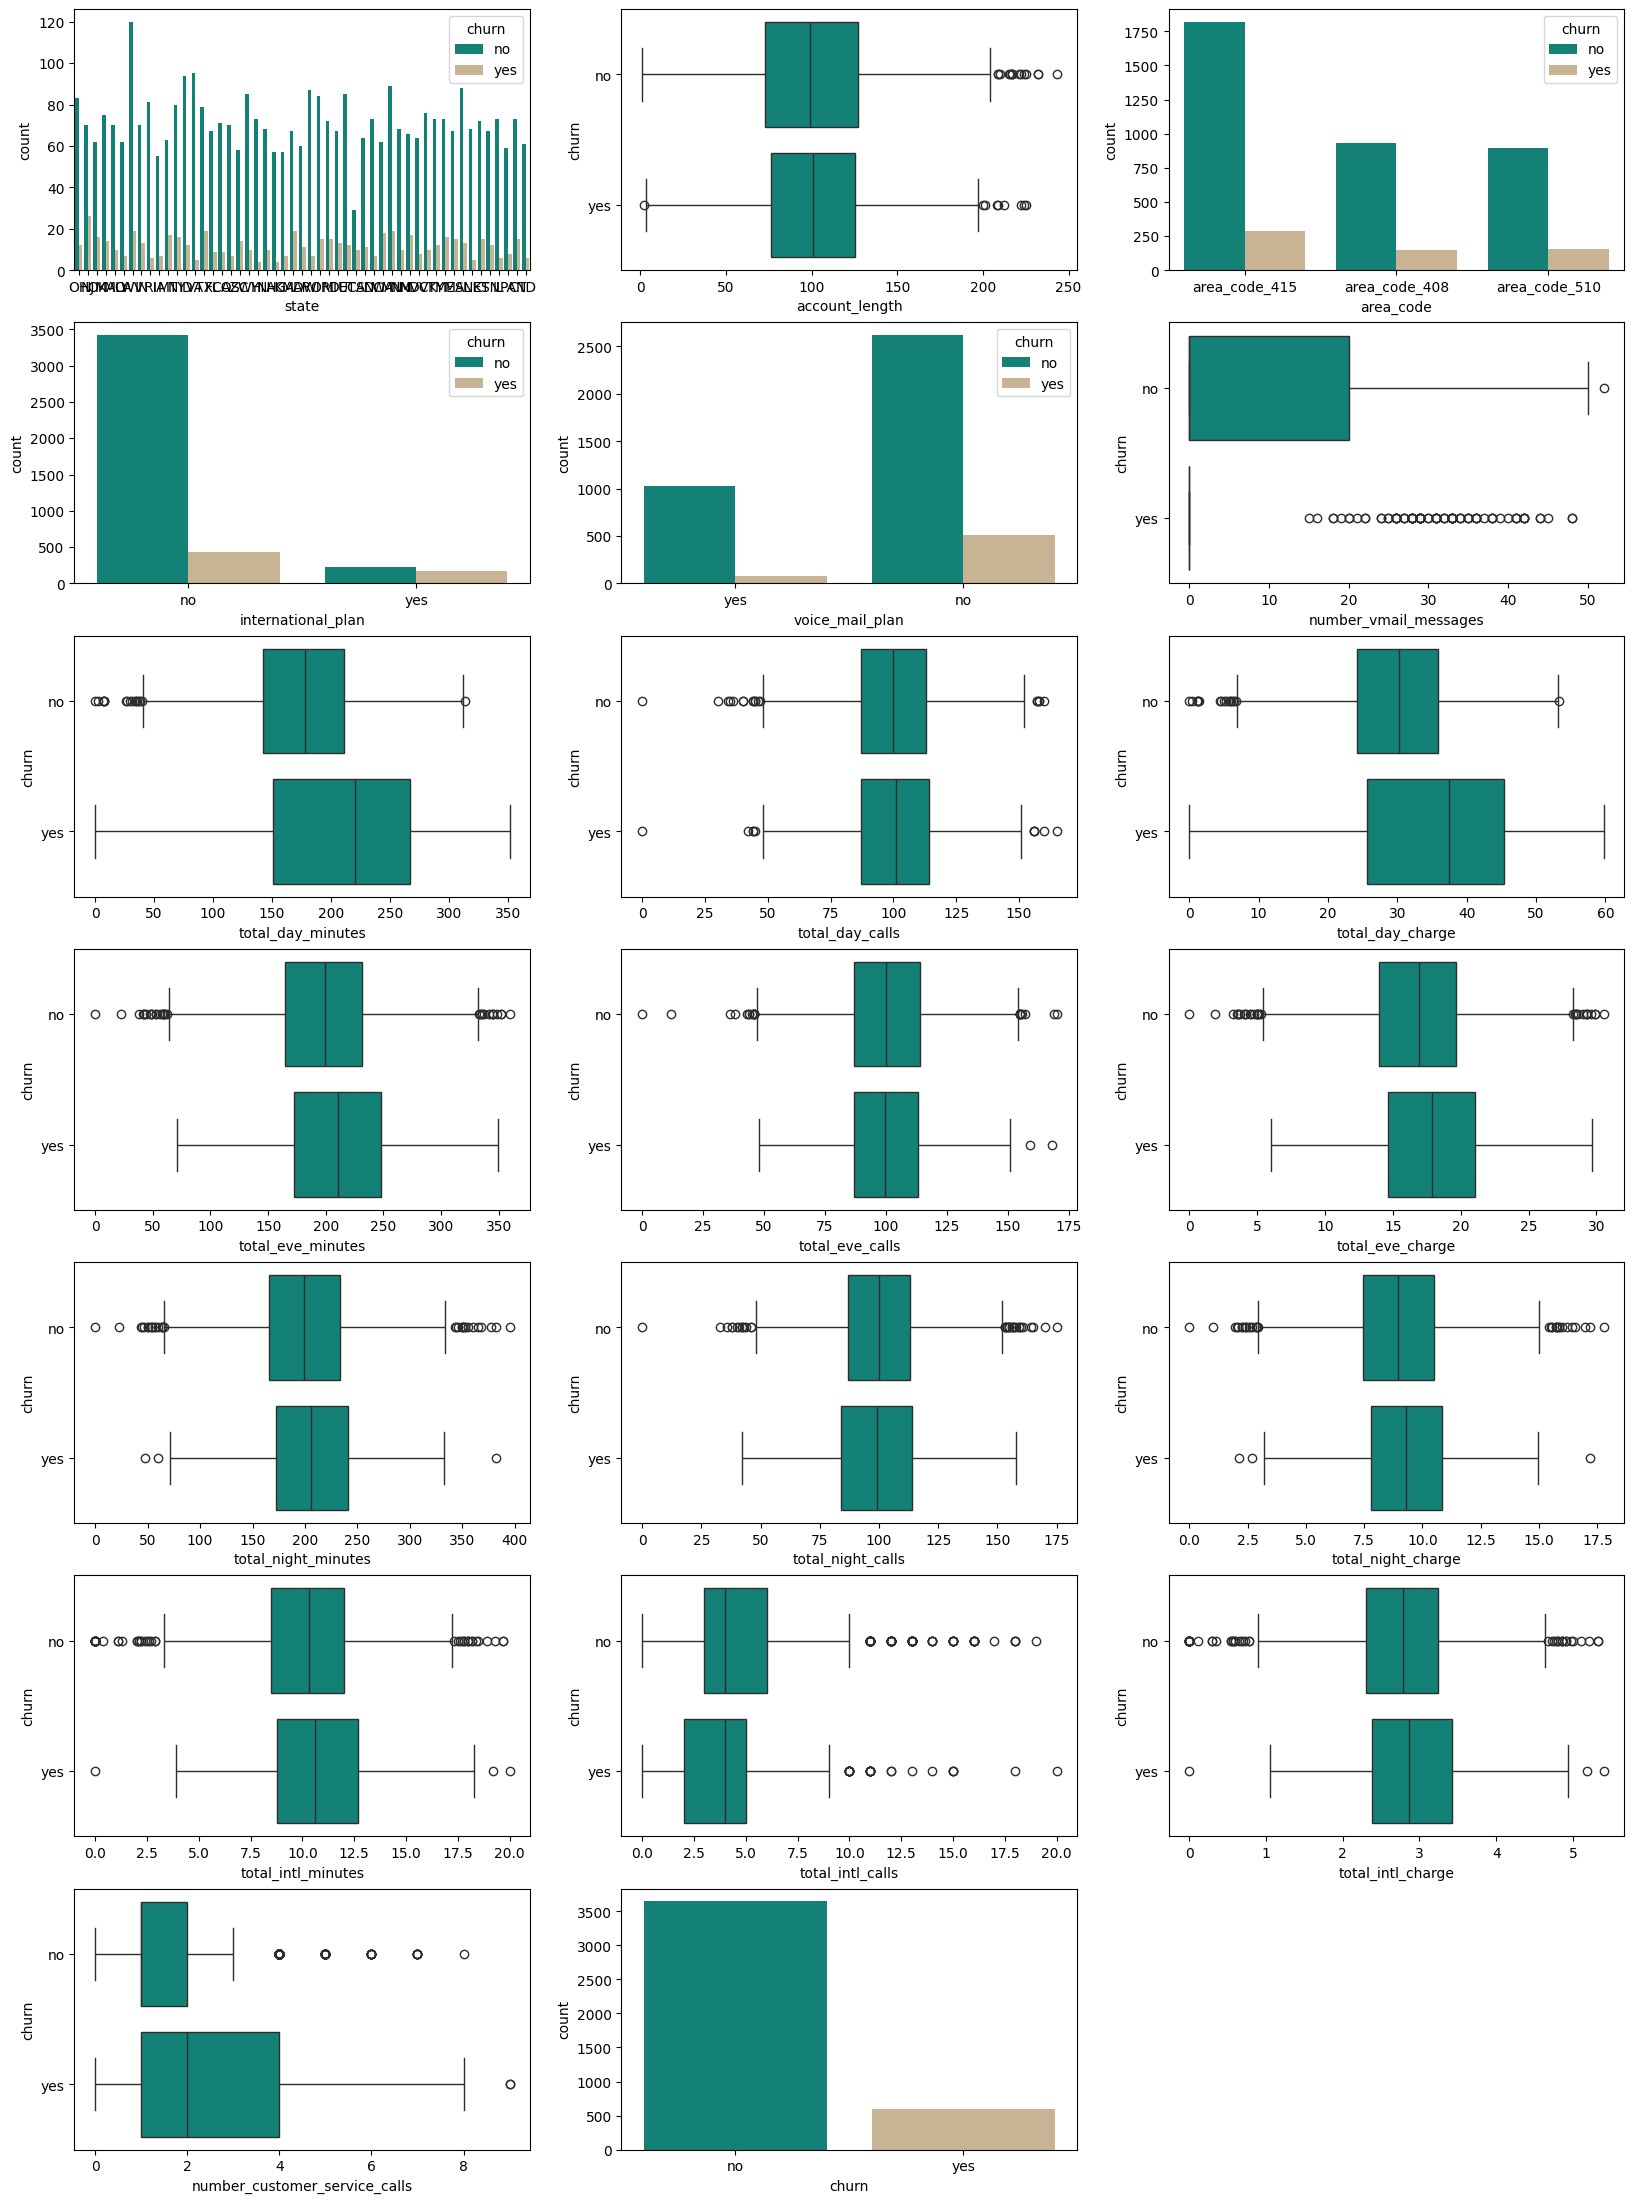

In [ ]:
cols = train.columns.tolist()
train.churn *= 1

plt.figure(figsize=(20, 40))

for i, variable in enumerate(train.columns.tolist()):
    plt.subplot(10, 3, i + 1)
    if train.dtypes[variable]=='object':
        sns.countplot(data=train, x=variable, hue='churn', palette=['#029386', '#d2b48c'])
        # plt.savefig('object.png')

    else:
        sns.boxplot(data=train, x=variable, y=train['churn'].astype('str'), color= '#029386')
        # plt.savefig('str.png')

plt.show()

### Feature Distribution

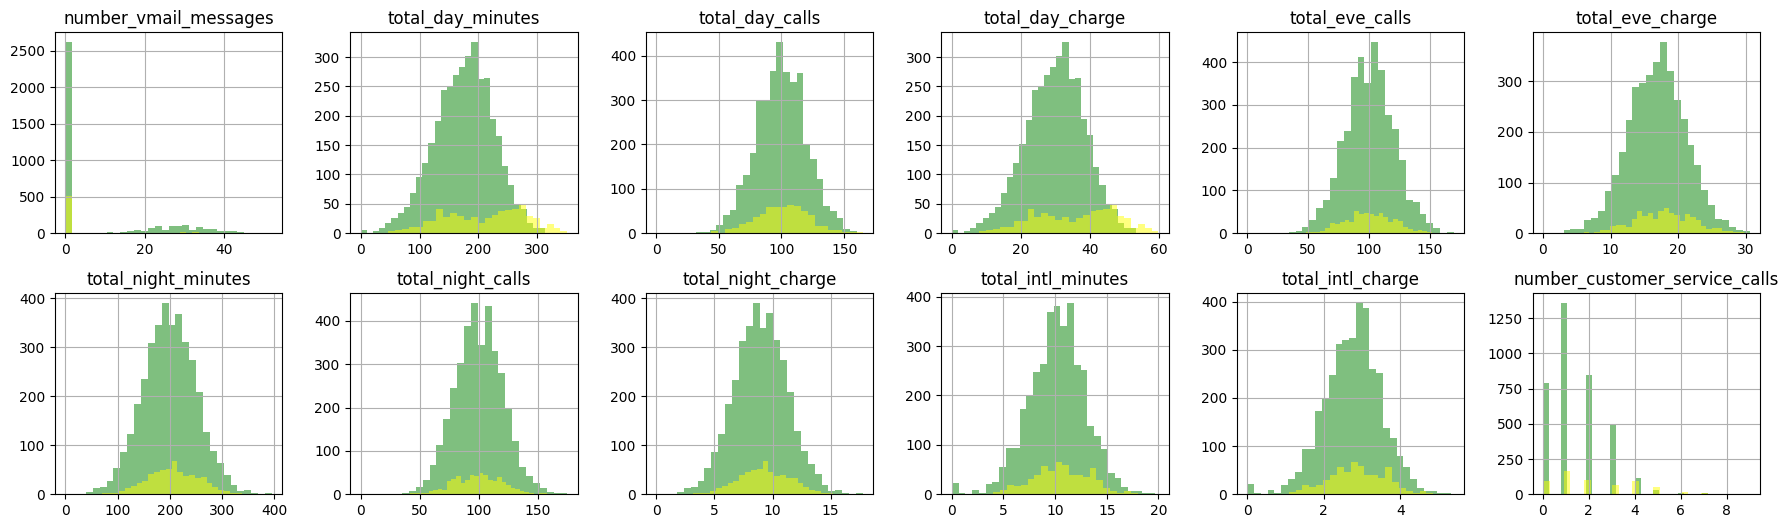

In [ ]:
pred_vars = ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
             'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
             'total_night_charge', 'total_intl_minutes',
             'total_intl_charge', 'number_customer_service_calls']

fig, ax = plt.subplots(2, 6, figsize=(22, 6));
train[train.churn == 'no'][pred_vars].hist( bins=30, color="green", alpha=0.5, ax=ax);
train[train.churn == 'yes'][pred_vars].hist( bins=30, color="yellow", alpha=0.5, ax=ax);

ket: hijau: No, kuning: Yes

Data churn menunjukkan data imbalance, sehingga dibutuhkan proses handling imbalance

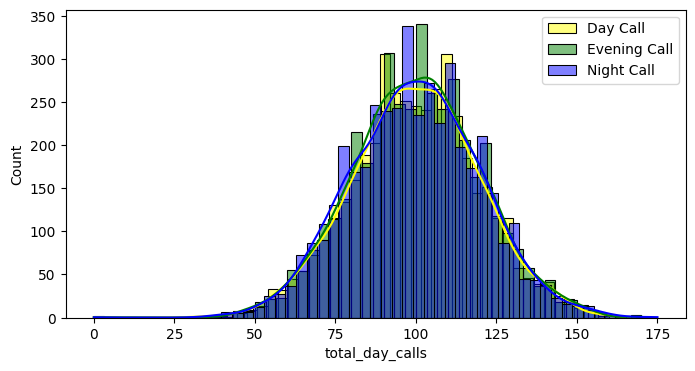

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(train.total_day_calls, color="yellow", label="Day Call", kde=True)
sns.histplot(train.total_eve_calls, color="green", label="Evening Call",kde=True)
sns.histplot(train.total_night_calls, color="blue", label="Night Call",kde=True)

plt.legend();

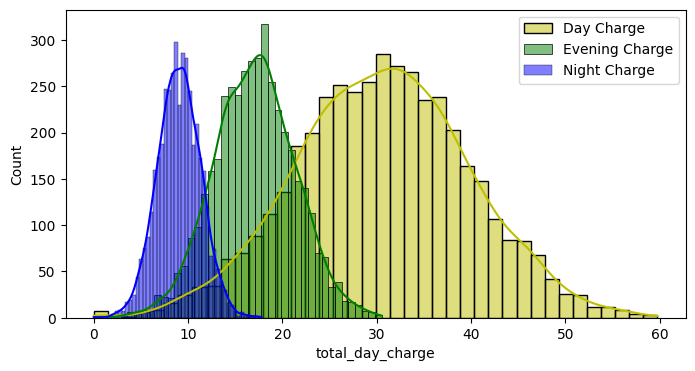

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(train.total_day_charge, color="y", label="Day Charge", kde=True)
sns.histplot(train.total_eve_charge, color="g", label="Evening Charge",kde=True)
sns.histplot(train.total_night_charge, color="b", label="Night Charge",kde=True)

plt.legend();


Data pada charge menunjukan data kurang terpusat, sehingga akan dilakukan normalisasi

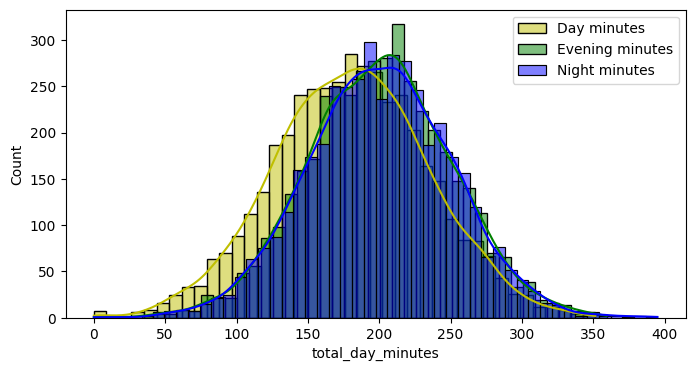

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(train.total_day_minutes, color="y", label="Day minutes", kde=True)
sns.histplot(train.total_eve_minutes, color="g", label="Evening minutes",kde=True)
sns.histplot(train.total_night_minutes, color="b", label="Night minutes",kde=True)

plt.legend();

Data pada minutes menunjukan data kurang terpusat, sehingga akan dilakukan normalisasi

### Feature Exploration

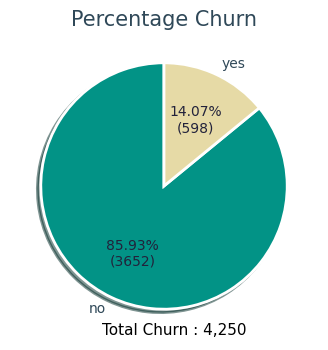

In [ ]:
total_churn = train.groupby('churn').agg(total=('churn', 'count')).reset_index()

colors = sns.color_palette(['#029386', '#e6daa6'])[0:5]
fig, ax=plt.subplots(figsize=(4,4), subplot_kw=dict(aspect='equal'))
wadges, texts, autotexts=ax.pie(total_churn['total'], labels=total_churn['churn']
                              , startangle=90
                              , shadow=True
                              , colors=colors
                              , wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'}
                              , autopct=lambda p:"{:.2f}%\n({:.0f})".format(p, (p*sum(total_churn['total'])/100))
                              , textprops=dict(color='k', fontsize=10))
plt.setp(autotexts, color='#22223b', fontweight='normal')
plt.setp(texts, color='#2F4858')
plt.title('Percentage Churn', pad=5, fontsize=15, color='#2F4858')
plt.text(-0.5,-1.2,"Total Churn : " + str('{:,}'.format(total_churn['total'].sum())), fontsize=11)
plt.show()

Rasio antra jumlah customer churn dan not churn pada grafik diatas terlihat jelas ada perbedaan yang sangat signifikan (data imbalance). Hal ini akan sangat berpengaruh pada hasil prediksi model machine learning nantinya, oleh karena itu pada tahapan pembuatan model nantinya kita akan melakukan penyeimbangan terhadap data yang tidak seimbangan ini dengan menggunakan SMOTE Method/ Random Over Sampling.

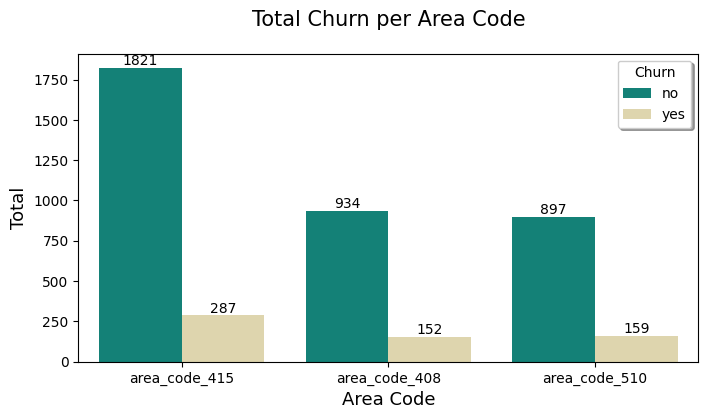

In [ ]:
# Total Churn per Area Code

fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=train, x='area_code', hue='churn',  palette=['#029386', '#e6daa6'])

# show bar labels
for i in ax.containers:
  ax.bar_label(i, label_type='edge', color='black')

plt.title('Total Churn per Area Code', pad=20, fontsize=15, color='black')
plt.xlabel('Area Code', fontsize=13)
plt.ylabel('Total', fontsize=13)
plt.xticks(color='black')
plt.yticks(color='black')
plt.legend(title='Churn', shadow=True)
plt.show()

Insight berikutnya yang kita dapatkan adalah, ternyata sebaran jumlah pengguna provider telekomunikasi yang sedang dianalisa terbanyak ada pada area code 415, sedangkan pada area code lainnya memiliki perbedaan yang tidak terlalu signifikan antara satu sama lain.

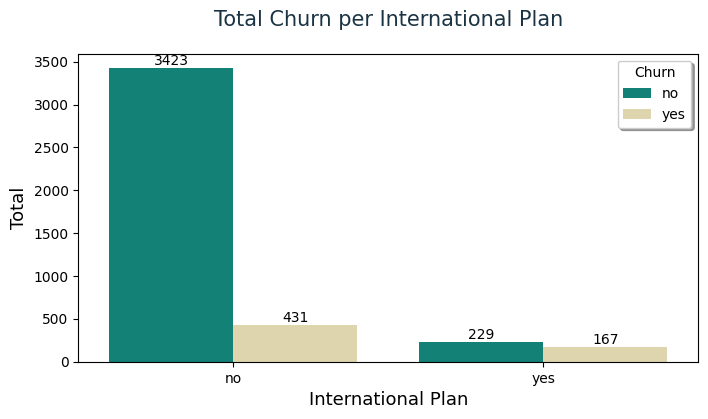

In [ ]:
# Total Churn per International Plan

fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=train, x='international_plan', hue='churn',  palette=['#029386', '#e6daa6'])

# show bar labels
for i in ax.containers:
  ax.bar_label(i, label_type='edge', color='black')

plt.title('Total Churn per International Plan', pad=20, fontsize=15, color='#1B3444')
plt.xlabel('International Plan', fontsize=13)
plt.ylabel('Total', fontsize=13)
plt.xticks(color='black')
plt.yticks(color='black')
plt.legend(title='Churn', shadow=True)
plt.show()

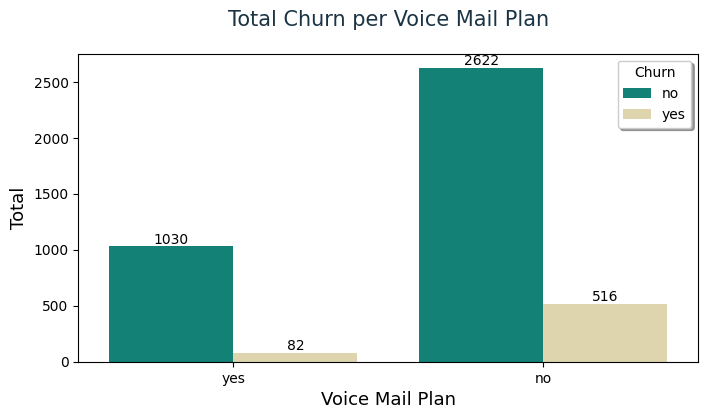

In [ ]:
# Total Churn per Voice Mail Plan

fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=train, x='voice_mail_plan', hue='churn',  palette=['#029386', '#e6daa6'])

# show bar labels
for i in ax.containers:
  ax.bar_label(i, label_type='edge', color='black')

plt.title('Total Churn per Voice Mail Plan', pad=20, fontsize=15, color='#1B3444')
plt.xlabel('Voice Mail Plan', fontsize=13)
plt.ylabel('Total', fontsize=13)
plt.xticks(color='black')
plt.yticks(color='black')
plt.legend(title='Churn', shadow=True)
plt.show()

### Feature Correlations

In [ ]:
# Check Correlations
train.corr()

<ipython-input-27-340bc738a3e8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893


<ipython-input-28-239035150821>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


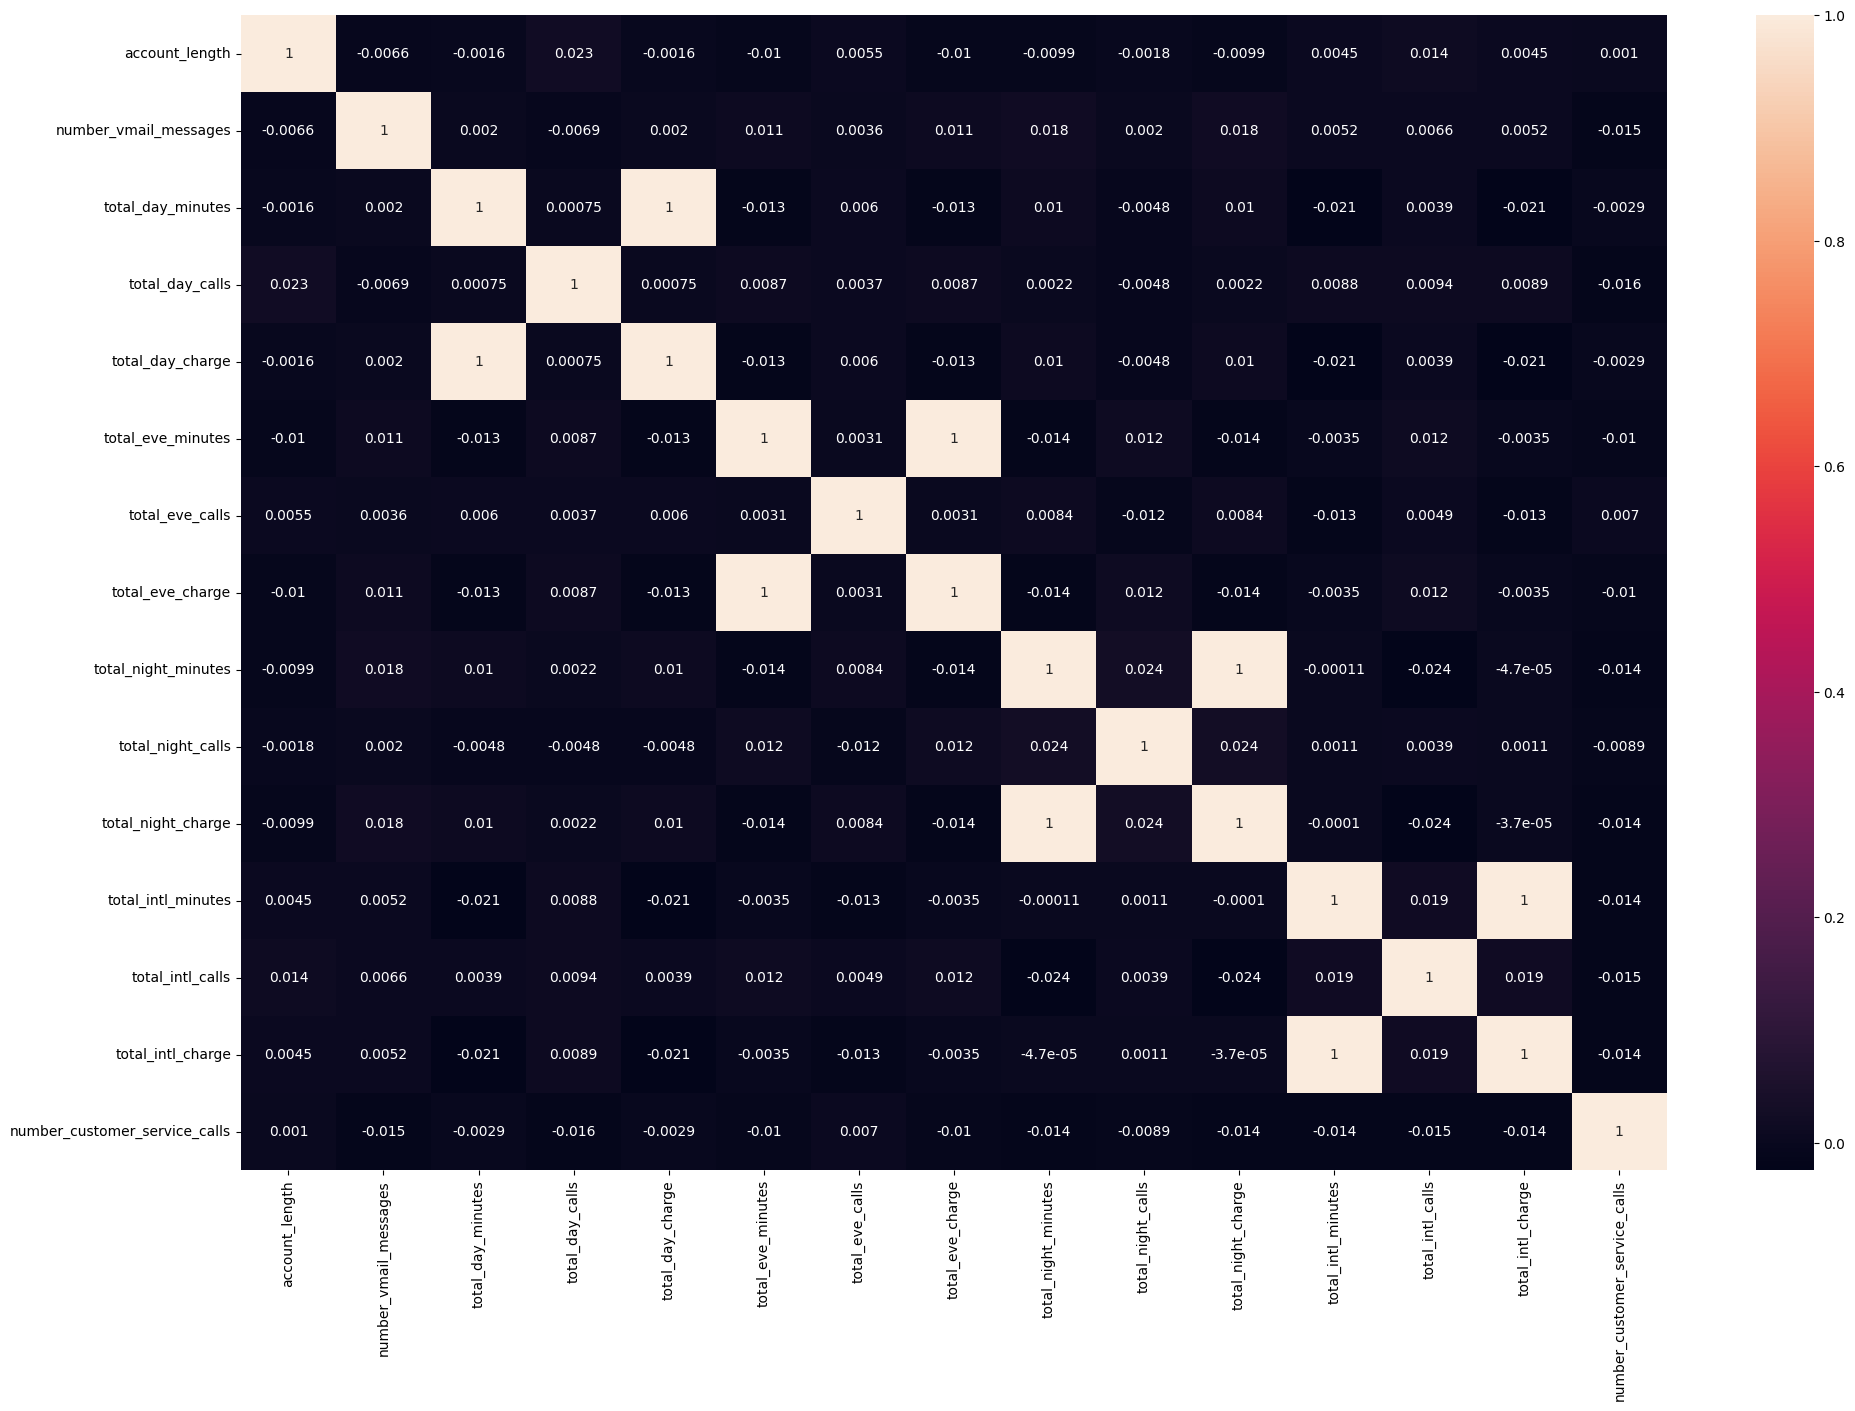

In [ ]:
# Korelasi dalam bentuk heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(23,15))
sns.heatmap(train.corr(),annot=True)
plt.show()

# Data PreProcessing

### Check Missing Value & Duplicate Data

In [ ]:
def cek_NA(df):
  print('NA/Missing Value: ', df.isnull().sum())
  print('Jumlah NA/Missing Value: ', df.isnull().sum().sum())
  print('Jumlah data duplikat: ', df.duplicated().sum())

cek_NA(train)

NA/Missing Value:  state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64
Jumlah NA/Missing Value:  0
Jumlah data duplikat:  0


### Handle Outliers

In [ ]:
from scipy import stats
import numpy as np

def cek_outliers(kolom):
  Q1 = kolom.quantile(0.25)
  Q3 = kolom.quantile(0.75)
  IQR = Q3 - Q1

  min_val = Q1 - 1.5*IQR
  max_val = Q3 + 1.5*IQR
  outliers = kolom[(kolom < min_val) | (kolom > max_val)].count()
  print(outliers)

def outliers(df):
  # jumlah outliers di data_train
  print('Jumlah outliers:\n ')
  num = df.select_dtypes('number').columns
  for col in num:
    print(col, end=' :')
    cek_outliers(df[col])

def handle_outliers(df):
  num = df.select_dtypes('number').columns
  print(f'\nJumlah baris sebelum memfilter outlier: {len(df)}')
  filtered_entries = np.array([True] * len(df))
  for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

  df = df[filtered_entries]
  print(f'Jumlah baris setelah memfilter outlier: {len(df)}')
  return df

In [ ]:
outliers(train)
train = handle_outliers(train)

Jumlah outliers:
 
account_length :20
number_vmail_messages :86
total_day_minutes :25
total_day_calls :28
total_day_charge :26
total_eve_minutes :34
total_eve_calls :24
total_eve_charge :34
total_night_minutes :37
total_night_calls :33
total_night_charge :37
total_intl_minutes :62
total_intl_calls :100
total_intl_charge :62
number_customer_service_calls :335

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3515


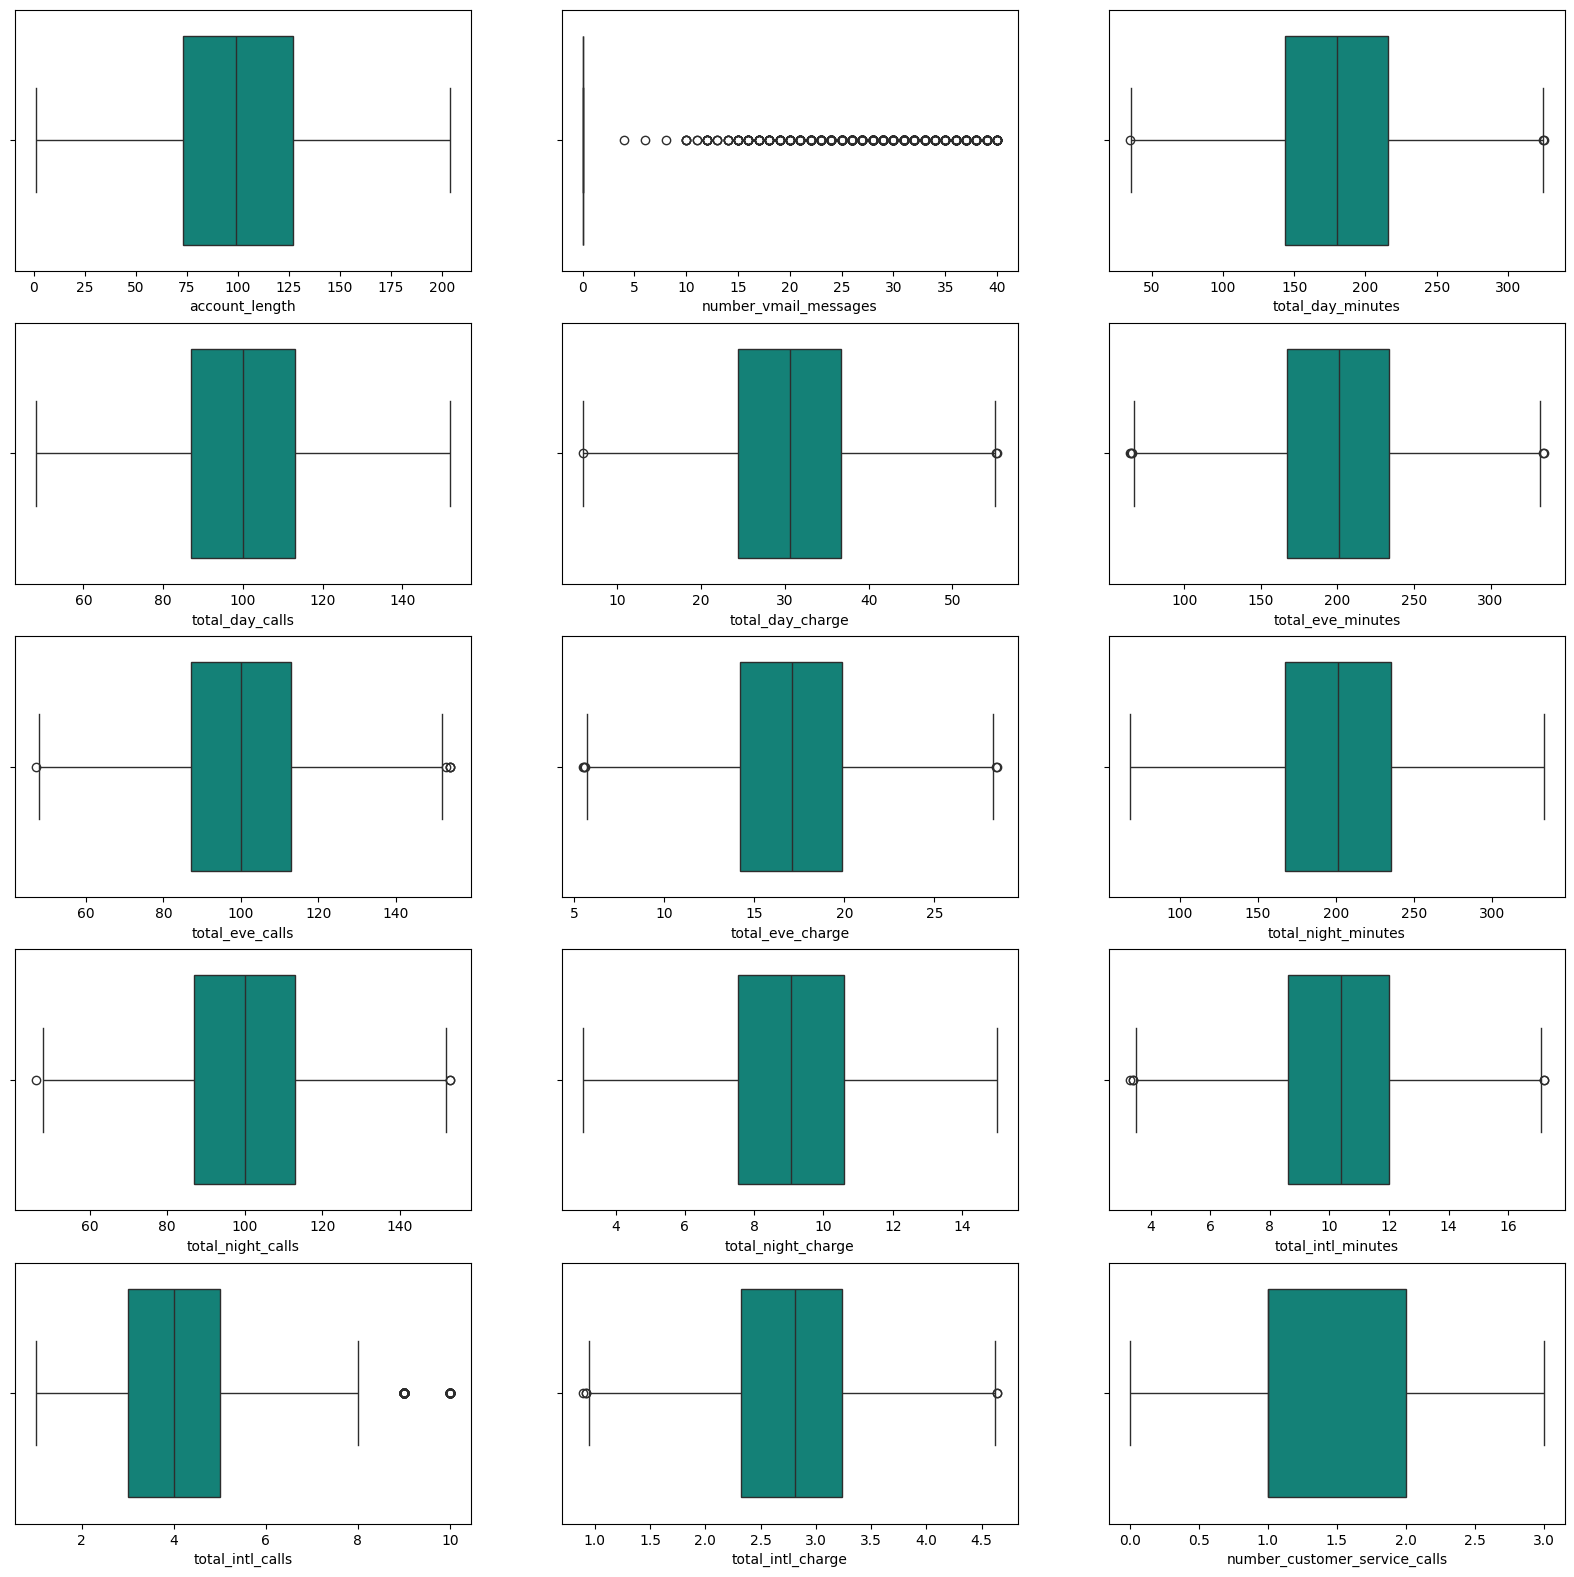

In [ ]:
# Plotting hanya grafik outlier setelah handling outlier
plt.figure(figsize=(20, 40))

for i, variable in enumerate(train.select_dtypes(include='number').columns):
    plt.subplot(10, 3, i + 1)
    sns.boxplot(data=train, x=variable, color= '#029386')
    # plt.savefig('outlier_' + variable + '.png')

plt.show()

## Normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def Normalisasi(df):
  num = df.select_dtypes('number').columns
  for kol in num:
    df[kol] = MinMaxScaler().fit_transform(df[kol].values.reshape(len(df), 1))
  return df

In [ ]:
Normalisasi(train)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,0.522167,area_code_415,no,yes,0.650,0.436920,0.721154,0.436805,0.484669,0.523364,0.484572,0.702408,0.532710,0.702341,0.748201,0.222222,0.749333,0.333333,no
1,NJ,0.669951,area_code_415,no,no,0.000,0.718116,0.634615,0.718099,0.210196,0.588785,0.209909,0.357035,0.542056,0.357023,0.640288,0.444444,0.640000,0.000000,no
3,OK,0.364532,area_code_415,yes,no,0.000,0.454452,0.625000,0.454398,0.310307,0.700935,0.310300,0.448457,0.700935,0.448161,0.489209,0.222222,0.490667,1.000000,no
5,MO,0.719212,area_code_415,yes,no,0.000,0.421107,0.298077,0.421031,0.143332,0.439252,0.142981,0.542137,0.467290,0.541806,0.273381,0.555556,0.274667,0.000000,no
7,WV,0.689655,area_code_415,yes,yes,0.925,0.770368,0.346154,0.770273,0.582564,0.598131,0.582355,0.973288,0.476636,0.973244,0.568345,0.444444,0.568000,0.000000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,ND,0.684729,area_code_510,no,no,0.000,0.722585,0.644231,0.722548,0.717769,0.504673,0.717514,0.615500,0.616822,0.615385,0.302158,0.555556,0.304000,0.333333,yes
4245,MT,0.403941,area_code_415,no,no,0.000,0.528704,0.211538,0.528615,0.663096,0.383178,0.662755,0.549285,0.308411,0.549331,0.503597,0.555556,0.504000,0.000000,no
4246,WV,0.354680,area_code_408,no,no,0.000,0.492953,0.394231,0.492821,0.247137,0.327103,0.246849,0.445824,0.401869,0.445652,0.589928,0.555556,0.592000,1.000000,no
4247,NC,0.364532,area_code_408,no,no,0.000,0.468202,0.509615,0.468150,0.475803,0.738318,0.475445,0.231001,0.542056,0.230769,0.258993,0.666667,0.258667,0.333333,no


In [ ]:
new_test= pd.read_csv("Data Test.csv")

In [ ]:
Normalisasi(new_test)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.000000,KS,0.535865,area_code_415,no,yes,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667
1,0.001335,AL,0.493671,area_code_510,yes,no,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000
2,0.002670,IA,0.257384,area_code_415,no,no,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667
3,0.004005,VT,0.388186,area_code_510,no,no,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000
4,0.005340,NE,0.729958,area_code_415,no,no,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.994660,GA,0.544304,area_code_415,no,no,0.000000,0.315992,0.483871,0.315945,0.586767,0.472441,0.587049,0.484365,0.634615,0.484397,0.597884,0.368421,0.598039,0.000000
746,0.995995,WA,0.303797,area_code_408,no,no,0.000000,0.486846,0.637097,0.486698,0.719699,0.370079,0.719745,0.609126,0.641026,0.609220,0.650794,0.105263,0.650980,0.500000
747,0.997330,WV,0.637131,area_code_415,no,no,0.000000,0.507538,0.411290,0.507390,0.678496,0.283465,0.678698,0.519145,0.647436,0.519149,0.777778,0.105263,0.778431,0.500000
748,0.998665,DC,0.253165,area_code_415,no,no,0.000000,0.378658,0.403226,0.378543,0.425865,0.716535,0.426044,0.515316,0.544872,0.515603,0.719577,0.210526,0.719608,0.166667


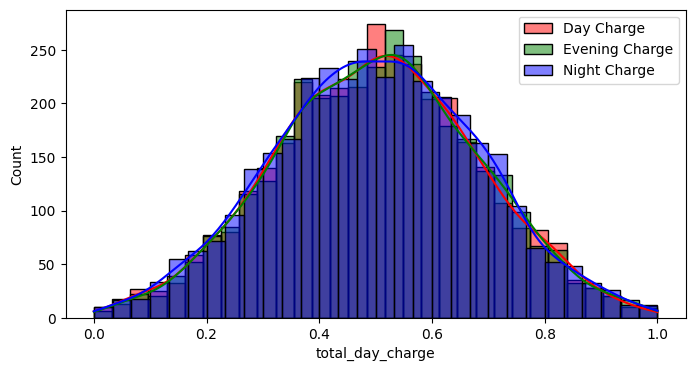

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(train.total_day_charge, color="r", label="Day Charge", kde=True)
sns.histplot(train.total_eve_charge, color="g", label="Evening Charge",kde=True)
sns.histplot(train.total_night_charge, color="b", label="Night Charge",kde=True)
#sns.histplot(df.total_intl_charge, color="y", label="International Charge",kde=True)#d
#plt.xlim(50,75)
plt.legend();

In [ ]:
from sklearn.preprocessing import LabelEncoder

def feature_encoding(df):
  cat = df.select_dtypes('object').columns
  print('Data categorical: \n')
  for kol in cat:
    print(kol, train[kol].unique())

  #melakukan label encoding
  for kol in cat.drop(['area_code','state']):
    df[kol] = LabelEncoder().fit_transform(df[kol])

  # melakukan one hot encoding pada area code
  for kol in ['area_code']:
    onehots_area_code = pd.get_dummies(df[kol], prefix=kol)
    df = df.join(onehots_area_code)
    return df

  return df

In [ ]:
train = feature_encoding(train)

Data categorical: 

state ['OH' 'NJ' 'OK' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VA' 'TX' 'FL' 'SC' 'WY'
 'HI' 'NH' 'AZ' 'AK' 'MA' 'GA' 'AR' 'WI' 'OR' 'MI' 'DE' 'IN' 'UT' 'CO'
 'CA' 'SD' 'NC' 'MN' 'NM' 'NV' 'DC' 'MD' 'VT' 'KY' 'LA' 'ME' 'MS' 'NE'
 'AL' 'NY' 'WA' 'TN' 'IL' 'KS' 'PA' 'CT' 'ND']
area_code ['area_code_415' 'area_code_408' 'area_code_510']
international_plan ['no' 'yes']
voice_mail_plan ['yes' 'no']
churn ['no' 'yes']


In [ ]:
train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,OH,0.522167,area_code_415,0,1,0.650,0.436920,0.721154,0.436805,0.484669,...,0.532710,0.702341,0.748201,0.222222,0.749333,0.333333,0,0,1,0
1,NJ,0.669951,area_code_415,0,0,0.000,0.718116,0.634615,0.718099,0.210196,...,0.542056,0.357023,0.640288,0.444444,0.640000,0.000000,0,0,1,0
3,OK,0.364532,area_code_415,1,0,0.000,0.454452,0.625000,0.454398,0.310307,...,0.700935,0.448161,0.489209,0.222222,0.490667,1.000000,0,0,1,0
5,MO,0.719212,area_code_415,1,0,0.000,0.421107,0.298077,0.421031,0.143332,...,0.467290,0.541806,0.273381,0.555556,0.274667,0.000000,0,0,1,0
7,WV,0.689655,area_code_415,1,1,0.925,0.770368,0.346154,0.770273,0.582564,...,0.476636,0.973244,0.568345,0.444444,0.568000,0.000000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,ND,0.684729,area_code_510,0,0,0.000,0.722585,0.644231,0.722548,0.717769,...,0.616822,0.615385,0.302158,0.555556,0.304000,0.333333,1,0,0,1
4245,MT,0.403941,area_code_415,0,0,0.000,0.528704,0.211538,0.528615,0.663096,...,0.308411,0.549331,0.503597,0.555556,0.504000,0.000000,0,0,1,0
4246,WV,0.354680,area_code_408,0,0,0.000,0.492953,0.394231,0.492821,0.247137,...,0.401869,0.445652,0.589928,0.555556,0.592000,1.000000,0,1,0,0
4247,NC,0.364532,area_code_408,0,0,0.000,0.468202,0.509615,0.468150,0.475803,...,0.542056,0.230769,0.258993,0.666667,0.258667,0.333333,0,1,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

def feature_encoding(df):
  cat = df.select_dtypes('object').columns
  print('Data categorical: \n')
  for kol in cat:
    print(kol, new_test[kol].unique())

  #melakukan label encoding
  for kol in cat.drop(['area_code','state']):
    df[kol] = LabelEncoder().fit_transform(df[kol])

  # melakukan one hot encoding pada area code
  for kol in ['area_code']:
    onehots_area_code = pd.get_dummies(df[kol], prefix=kol)
    df = df.join(onehots_area_code)
    return df

  return df

In [ ]:
dataset_test= feature_encoding(new_test)

Data categorical: 

state ['KS' 'AL' 'IA' 'VT' 'NE' 'IL' 'LA' 'GA' 'NJ' 'ID' 'WY' 'WI' 'MN' 'CO'
 'TX' 'AK' 'MA' 'MO' 'NY' 'FL' 'MI' 'WA' 'UT' 'SC' 'OK' 'DE' 'NH' 'PA'
 'AZ' 'MD' 'VA' 'IN' 'NM' 'MS' 'CT' 'RI' 'SD' 'MT' 'OR' 'ME' 'CA' 'OH'
 'AR' 'DC' 'ND' 'WV' 'NC' 'HI' 'NV' 'TN' 'KY']
area_code ['area_code_415' 'area_code_510' 'area_code_408']
international_plan ['no' 'yes']
voice_mail_plan ['yes' 'no']


## Drop kolom yang tidak dibutuhkan

In [ ]:
train = train.drop(['state', 'area_code', ], axis=1)
train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,0.522167,0,1,0.650,0.436920,0.721154,0.436805,0.484669,0.523364,0.484572,...,0.532710,0.702341,0.748201,0.222222,0.749333,0.333333,0,0,1,0
1,0.669951,0,0,0.000,0.718116,0.634615,0.718099,0.210196,0.588785,0.209909,...,0.542056,0.357023,0.640288,0.444444,0.640000,0.000000,0,0,1,0
3,0.364532,1,0,0.000,0.454452,0.625000,0.454398,0.310307,0.700935,0.310300,...,0.700935,0.448161,0.489209,0.222222,0.490667,1.000000,0,0,1,0
5,0.719212,1,0,0.000,0.421107,0.298077,0.421031,0.143332,0.439252,0.142981,...,0.467290,0.541806,0.273381,0.555556,0.274667,0.000000,0,0,1,0
7,0.689655,1,1,0.925,0.770368,0.346154,0.770273,0.582564,0.598131,0.582355,...,0.476636,0.973244,0.568345,0.444444,0.568000,0.000000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,0.684729,0,0,0.000,0.722585,0.644231,0.722548,0.717769,0.504673,0.717514,...,0.616822,0.615385,0.302158,0.555556,0.304000,0.333333,1,0,0,1
4245,0.403941,0,0,0.000,0.528704,0.211538,0.528615,0.663096,0.383178,0.662755,...,0.308411,0.549331,0.503597,0.555556,0.504000,0.000000,0,0,1,0
4246,0.354680,0,0,0.000,0.492953,0.394231,0.492821,0.247137,0.327103,0.246849,...,0.401869,0.445652,0.589928,0.555556,0.592000,1.000000,0,1,0,0
4247,0.364532,0,0,0.000,0.468202,0.509615,0.468150,0.475803,0.738318,0.475445,...,0.542056,0.230769,0.258993,0.666667,0.258667,0.333333,0,1,0,0


In [ ]:
dataset_test = dataset_test.drop(['id', 'state', 'area_code', ], axis=1)
dataset_test

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
0,0.535865,0,1,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667,0,1,0
1,0.493671,1,0,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000,0,0,1
2,0.257384,0,0,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667,0,1,0
3,0.388186,0,0,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000,0,0,1
4,0.729958,0,0,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.544304,0,0,0.000000,0.315992,0.483871,0.315945,0.586767,0.472441,0.587049,0.484365,0.634615,0.484397,0.597884,0.368421,0.598039,0.000000,0,1,0
746,0.303797,0,0,0.000000,0.486846,0.637097,0.486698,0.719699,0.370079,0.719745,0.609126,0.641026,0.609220,0.650794,0.105263,0.650980,0.500000,1,0,0
747,0.637131,0,0,0.000000,0.507538,0.411290,0.507390,0.678496,0.283465,0.678698,0.519145,0.647436,0.519149,0.777778,0.105263,0.778431,0.500000,0,1,0
748,0.253165,0,0,0.000000,0.378658,0.403226,0.378543,0.425865,0.716535,0.426044,0.515316,0.544872,0.515603,0.719577,0.210526,0.719608,0.166667,0,1,0


In [ ]:
# Data setelah preprocessing
print('Data Train: ', train.shape)
print(train.info())

Data Train:  (3515, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3515 entries, 0 to 4248
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 3515 non-null   float64
 1   international_plan             3515 non-null   int64  
 2   voice_mail_plan                3515 non-null   int64  
 3   number_vmail_messages          3515 non-null   float64
 4   total_day_minutes              3515 non-null   float64
 5   total_day_calls                3515 non-null   float64
 6   total_day_charge               3515 non-null   float64
 7   total_eve_minutes              3515 non-null   float64
 8   total_eve_calls                3515 non-null   float64
 9   total_eve_charge               3515 non-null   float64
 10  total_night_minutes            3515 non-null   float64
 11  total_night_calls              3515 non-null   float64
 12  total_night_charge      

In [ ]:
# Data setelah preprocessing
print('Data Test: ', dataset_test.shape)
print(dataset_test.info())

Data Test:  (750, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 750 non-null    float64
 1   international_plan             750 non-null    int64  
 2   voice_mail_plan                750 non-null    int64  
 3   number_vmail_messages          750 non-null    float64
 4   total_day_minutes              750 non-null    float64
 5   total_day_calls                750 non-null    float64
 6   total_day_charge               750 non-null    float64
 7   total_eve_minutes              750 non-null    float64
 8   total_eve_calls                750 non-null    float64
 9   total_eve_charge               750 non-null    float64
 10  total_night_minutes            750 non-null    float64
 11  total_night_calls              750 non-null    float64
 12  total_night_charge          

# Data Preparation

## Train Test Split

In [ ]:
X = train.drop(['churn'],axis=1)
y = train['churn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=200)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2812, 20), (703, 20), (2812,), (703,))

In [ ]:
X_train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510
3802,0.522167,0,0,0.000,0.767274,0.480769,0.767240,0.340598,0.345794,0.340287,0.138074,0.719626,0.137960,0.467626,0.222222,0.469333,0.333333,0,0,1
3822,0.472906,0,0,0.000,0.724304,0.586538,0.724166,0.373846,0.981308,0.373751,0.344244,0.467290,0.343645,0.417266,0.777778,0.418667,0.333333,0,1,0
3927,0.871921,0,0,0.000,0.656239,0.538462,0.656218,0.171407,0.401869,0.171230,0.249812,0.588785,0.249164,0.863309,0.444444,0.864000,0.666667,0,0,1
3685,0.448276,0,0,0.000,0.382949,0.403846,0.382811,0.309568,0.542056,0.309431,0.653123,0.439252,0.653010,0.366906,0.000000,0.368000,0.666667,0,1,0
1314,0.389163,0,0,0.000,0.392231,0.557692,0.392113,0.541190,0.168224,0.541069,0.511663,0.373832,0.511706,0.482014,0.111111,0.482667,0.666667,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,0.443350,0,1,0.975,0.434170,0.471154,0.434176,0.203177,0.065421,0.202955,0.301731,0.514019,0.301839,0.503597,0.222222,0.504000,1.000000,0,0,1
2245,0.507389,0,0,0.000,0.358199,0.500000,0.358140,0.558182,0.102804,0.558018,0.363431,0.485981,0.362876,0.115108,0.333333,0.114667,0.666667,0,1,0
968,0.630542,0,0,0.000,0.460296,0.663462,0.460263,0.564463,0.766355,0.564103,0.052295,0.504673,0.051839,0.611511,0.666667,0.613333,0.333333,0,1,0
760,0.620690,0,1,0.625,0.163974,0.451923,0.163802,0.365719,0.579439,0.365493,0.741911,0.542056,0.741639,0.129496,0.555556,0.130667,0.000000,0,1,0


In [ ]:
y_train

3802    0
3822    0
3927    1
3685    0
1314    0
       ..
3460    0
2245    0
968     0
760     0
2196    0
Name: churn, Length: 2812, dtype: int64

In [ ]:
y_train.value_counts(), y_test.value_counts()

(0    2512
 1     300
 Name: churn, dtype: int64,
 0    635
 1     68
 Name: churn, dtype: int64)

In [ ]:
# melakukan resampling
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()
X_train, y_train = SMOTE.fit_resample(X_train, y_train)

# Modelling

## KNN

In [ ]:

# Parameter untuk grid search
knn_param_grid = {
    'n_neighbors': np.arange(1, 11),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

# Buat model KNN
knn = KNeighborsClassifier()

# Lakukan grid search
grid_search_knn = GridSearchCV(knn, knn_param_grid, cv=5)
grid_search_knn.fit(X_train, y_train)

# Lihat hasil grid search
knn_best_model = grid_search_knn.best_params_
print("Best parameters:", grid_search_knn.best_params_)
print("Best score:", grid_search_knn.best_score_)

# Prediksi dengan model terbaik
y_pred_knn = grid_search_knn.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred_knn))


Best parameters: {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}
Best score: 0.9448655130720898
Accuracy: 0.871977240398293


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       635
           1       0.36      0.40      0.37        68

    accuracy                           0.87       703
   macro avg       0.64      0.66      0.65       703
weighted avg       0.88      0.87      0.88       703



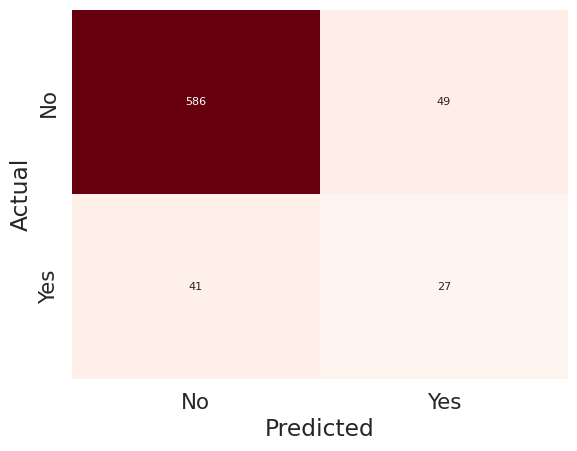

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(cm, annot=True, annot_kws={"size": 8}, cmap='Reds', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'])

#classification report
cm = confusion_matrix(y_test, y_pred_knn)
print(classification_report(y_test, y_pred_knn))

# tampilkan plot
plt.show()


## DECISION TRESS

Tanpa Hyperparameter Tuning

In [ ]:
# buat model DT
dt = DecisionTreeClassifier()

# apply pada data train
dt_train = dt.fit(X_train, y_train)

# prediksi data validasi
y_pred_dt = dt_train.predict(X_test)

# Evaluasi model
print("DT No Tunning Accuracy:", accuracy_score(y_test, y_pred_dt))

DT No Tunning Accuracy: 0.8847795163584637


              precision    recall  f1-score   support

           0       0.98      0.89      0.93       635
           1       0.45      0.79      0.57        68

    accuracy                           0.88       703
   macro avg       0.71      0.84      0.75       703
weighted avg       0.92      0.88      0.90       703



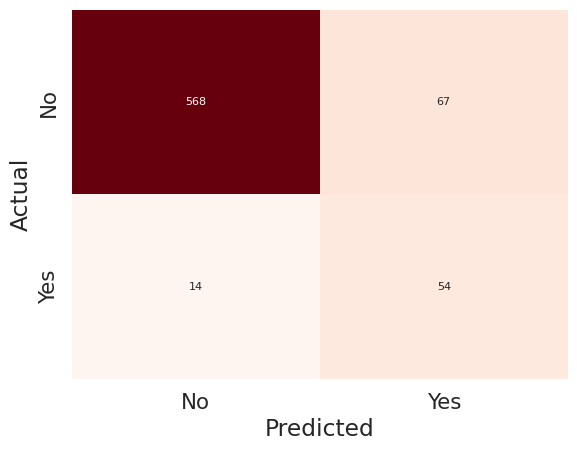

In [ ]:
# confusion matrix tanpa tunning
cm = confusion_matrix(y_test, y_pred_dt)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# buat heatmap confusion matrix
sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(cm, annot=True, annot_kws={"size": 8}, cmap='Reds', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'])

#classification report
cm = confusion_matrix(y_test, y_pred_dt)
print(classification_report(y_test, y_pred_dt))

# tampilkan plot
plt.show()

Dengan Hyperparameter Tuning

Akurasi terbaik : 0.9020736140923382
Parameter terbaik : {'max_depth': 9, 'min_samples_split': 2}
Estimator : DecisionTreeClassifier(max_depth=9)


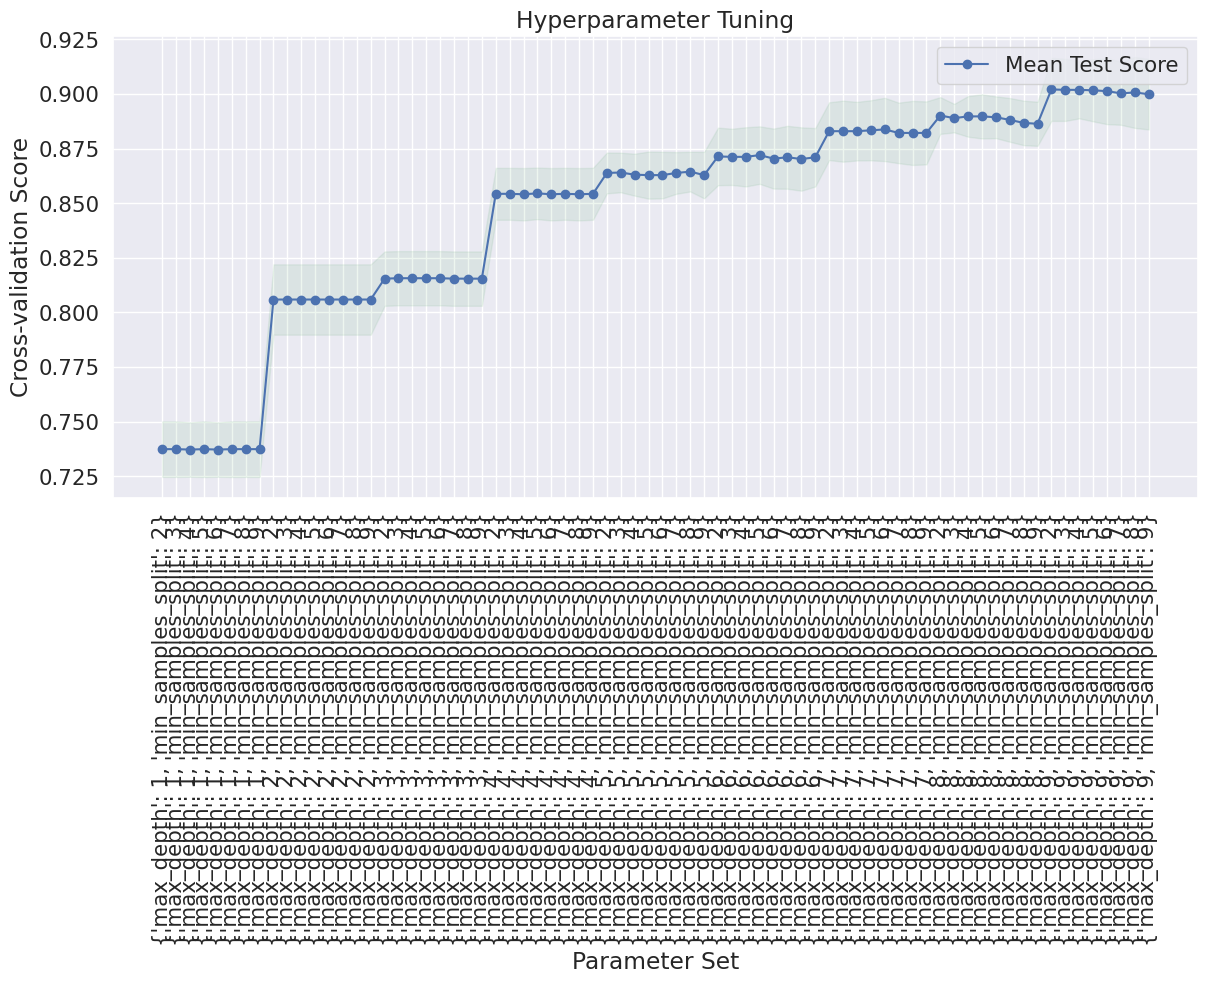

In [ ]:
# buat model DT
DT = DecisionTreeClassifier()

# definisikan parameter
param_grid = {'max_depth': list(range(1,10)), 'min_samples_split': list(range(2,10))}

# hyperparameter tunning dengan grid search dan k-fold 10
grid = GridSearchCV(DT, param_grid, cv=10, scoring='accuracy')

# apply pada data train
DT_Tune = grid.fit(X_train, y_train)


print('Akurasi terbaik :', grid.best_score_)
print('Parameter terbaik :',grid.best_params_)
print('Estimator :', grid.best_estimator_)

# lihat hasil tunning
# print(grid.cv_results_)

# lihat hasil akurasi tunning dalam bentuk grafik
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = [str(x) for x in grid.cv_results_['params']]

plt.figure(figsize=(14, 6))

# Plotting the mean test scores
plt.plot(params, means, marker='o', label='Mean Test Score')

# Plotting the standard deviations
plt.fill_between(params, means - stds, means + stds, alpha=0.1, color='g')

plt.title('Hyperparameter Tuning')
plt.xlabel('Parameter Set')
plt.ylabel('Cross-validation Score')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# prediksi pada data val
y_DT_T_pred = DT_Tune.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       635
           1       0.60      0.82      0.70        68

    accuracy                           0.93       703
   macro avg       0.79      0.88      0.83       703
weighted avg       0.94      0.93      0.94       703



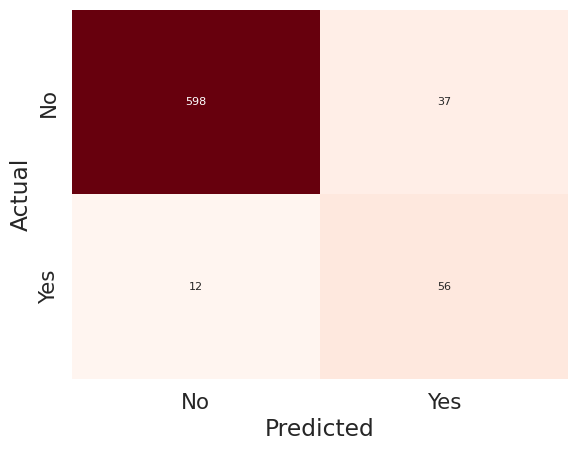

In [ ]:
# confusion matrix hasil tunning
cm = confusion_matrix(y_test, y_DT_T_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# buat heatmap confusion matrix
sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(cm, annot=True, annot_kws={"size": 8}, cmap='Reds', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'])

#classification report
cm = confusion_matrix(y_test, y_DT_T_pred)
print(classification_report(y_test, y_DT_T_pred))

# tampilkan plot
plt.show()

## Random Forest

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Parameter untuk grid search
rf_param_distributions = {
    'n_estimators': np.arange(10, 200),
    'max_depth': np.arange(1, 11),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5),
}

# Buat model Random Forest
rf = RandomForestClassifier()

# Lakukan grid search
random_search_rf = RandomizedSearchCV(rf, rf_param_distributions, n_iter=100, cv=5)
random_search_rf.fit(X_train, y_train)

# Lihat hasil grid search
print("Best parameters:", random_search_rf.best_params_)
print("Best score:", random_search_rf.best_score_)

# Prediksi dengan model terbaik
y_pred_rf = random_search_rf.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Best parameters: {'n_estimators': 55, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 10}
Best score: 0.915207627202632
Accuracy: 0.9672830725462305


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       635
           1       0.82      0.85      0.83        68

    accuracy                           0.97       703
   macro avg       0.90      0.92      0.91       703
weighted avg       0.97      0.97      0.97       703



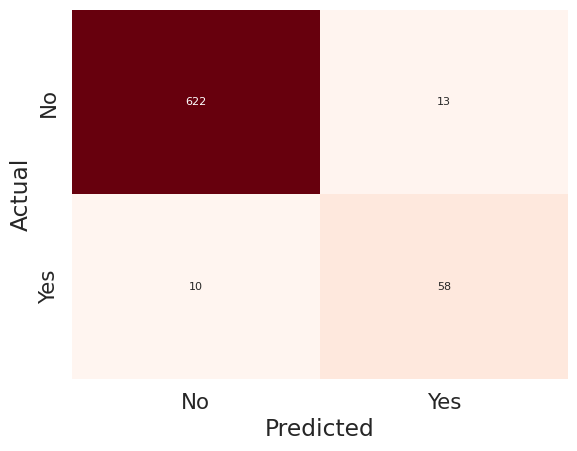

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# buat heatmap confusion matrix
sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(cm, annot=True, annot_kws={"size": 8}, cmap='Reds', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'])

#classification report
cm = confusion_matrix(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

# tampilkan plot
plt.show()

- Dari ke-3 model machine learning sebelumnya dan dengan membandingkan hasil akurasi, recall, presisi maka dapat disimpulan bahwa model Random Forest menghasilkan performa yang paling baik sehingga model ini akan dipilih untuk melakukan prediksi pada data test nantinya.

# TAMBAHAN ANALISA

ketika proporsi 70:30 menggunakan Decision Tree

In [ ]:
x = train.drop(['churn'],axis=1)
Y = train['churn']

from sklearn.model_selection import train_test_split

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size =0.3, random_state=42)
x_train.shape, x_test.shape, Y_train.shape, Y_test.shape

((2460, 20), (1055, 20), (2460,), (1055,))

Tanpa Tuning

In [ ]:
# buat model DT
dt = DecisionTreeClassifier()

# apply pada data train
dt_train = dt.fit(x_train, Y_train)

# prediksi data validasi
Y_pred_dt = dt_train.predict(x_test)

# Evaluasi model
print("DT No Tunning Accuracy:", accuracy_score(Y_test, Y_pred_dt))

DT No Tunning Accuracy: 0.9355450236966825


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       943
           1       0.71      0.67      0.69       112

    accuracy                           0.94      1055
   macro avg       0.83      0.82      0.83      1055
weighted avg       0.93      0.94      0.93      1055



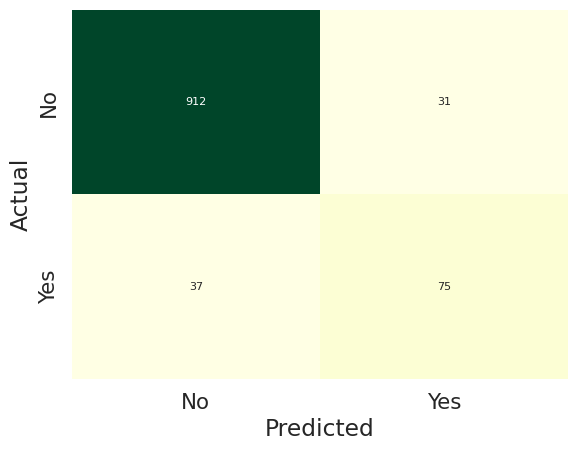

In [ ]:
# confusion matrix tanpa tunning
cm = confusion_matrix(Y_test, Y_pred_dt)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# buat heatmap confusion matrix
sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(cm, annot=True, annot_kws={"size": 8}, cmap='YlGn', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'])

#classification report
cm = confusion_matrix(Y_test, Y_pred_dt)
print(classification_report(Y_test, Y_pred_dt))

# tampilkan plot
plt.show()

Dengan Tuning

Akurasi terbaik : 0.9556910569105691
Parameter terbaik : {'max_depth': 5, 'min_samples_split': 7}
Estimator : DecisionTreeClassifier(max_depth=5, min_samples_split=7)


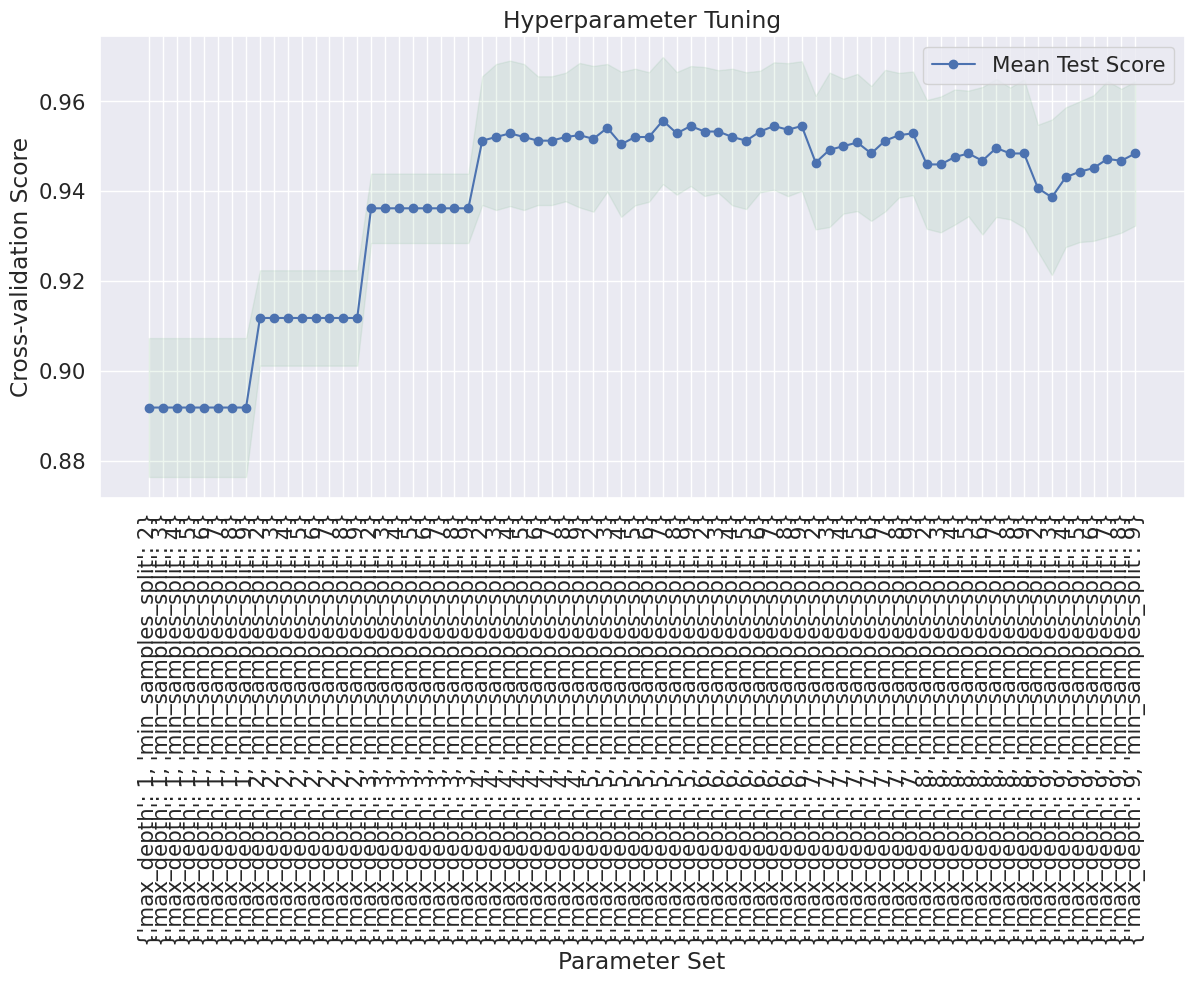

In [ ]:
# buat model DT
DT = DecisionTreeClassifier()

# definisikan parameter
param_grid_2 = {'max_depth': list(range(1,10)), 'min_samples_split': list(range(2,10))}

# hyperparameter tunning dengan grid search dan k-fold 10
grid_2 = GridSearchCV(DT, param_grid_2, cv=10, scoring='accuracy')

# apply pada data train
DT_Tune_2 = grid_2.fit(x_train, Y_train)


print('Akurasi terbaik :', grid_2.best_score_)
print('Parameter terbaik :',grid_2.best_params_)
print('Estimator :', grid_2.best_estimator_)

# lihat hasil tunning
# print(grid.cv_results_)

# lihat hasil akurasi tunning dalam bentuk grafik
means = grid_2.cv_results_['mean_test_score']
stds = grid_2.cv_results_['std_test_score']
params = [str(x) for x in grid_2.cv_results_['params']]

plt.figure(figsize=(14, 6))

# Plotting the mean test scores
plt.plot(params, means, marker='o', label='Mean Test Score')

# Plotting the standard deviations
plt.fill_between(params, means - stds, means + stds, alpha=0.1, color='g')

plt.title('Hyperparameter Tuning')
plt.xlabel('Parameter Set')
plt.ylabel('Cross-validation Score')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# prediksi pada data val
y_DT_T2_pred = DT_Tune_2.predict(x_test)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       943
           1       0.93      0.63      0.76       112

    accuracy                           0.96      1055
   macro avg       0.95      0.81      0.87      1055
weighted avg       0.96      0.96      0.95      1055



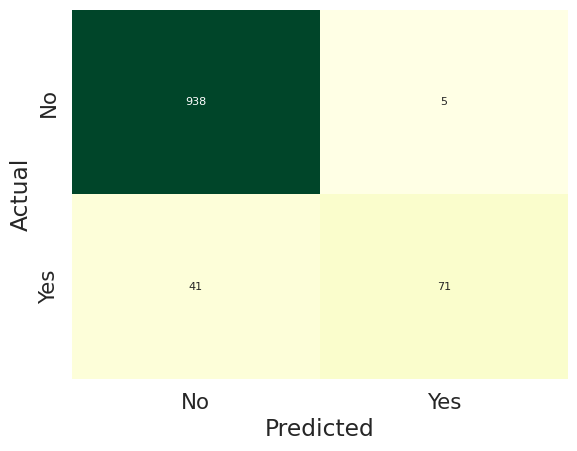

In [ ]:
# confusion matrix hasil tunning
cm = confusion_matrix(Y_test, y_DT_T2_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# buat heatmap confusion matrix
sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(cm, annot=True, annot_kws={"size": 8}, cmap='YlGn', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'])

#classification report
cm = confusion_matrix(Y_test, y_DT_T2_pred)
print(classification_report(Y_test, y_DT_T2_pred))

# tampilkan plot
plt.show()

# Prediction Data Test

**Menggunakan Random Forest**

In [ ]:
dataset_test.shape

(750, 20)

In [ ]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 750 non-null    float64
 1   international_plan             750 non-null    int64  
 2   voice_mail_plan                750 non-null    int64  
 3   number_vmail_messages          750 non-null    float64
 4   total_day_minutes              750 non-null    float64
 5   total_day_calls                750 non-null    float64
 6   total_day_charge               750 non-null    float64
 7   total_eve_minutes              750 non-null    float64
 8   total_eve_calls                750 non-null    float64
 9   total_eve_charge               750 non-null    float64
 10  total_night_minutes            750 non-null    float64
 11  total_night_calls              750 non-null    float64
 12  total_night_charge             750 non-null    flo

In [ ]:
test_predict = random_search_rf.predict(dataset_test)
test_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,

In [ ]:
dataset_test['churn'] = test_predict

In [ ]:
dataset_test

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,churn
0,0.535865,0,1,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,...,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667,0,1,0,0
1,0.493671,1,0,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,...,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000,0,0,1,0
2,0.257384,0,0,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,...,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667,0,1,0,0
3,0.388186,0,0,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,...,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000,0,0,1,0
4,0.729958,0,0,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,...,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.544304,0,0,0.000000,0.315992,0.483871,0.315945,0.586767,0.472441,0.587049,...,0.634615,0.484397,0.597884,0.368421,0.598039,0.000000,0,1,0,0
746,0.303797,0,0,0.000000,0.486846,0.637097,0.486698,0.719699,0.370079,0.719745,...,0.641026,0.609220,0.650794,0.105263,0.650980,0.500000,1,0,0,0
747,0.637131,0,0,0.000000,0.507538,0.411290,0.507390,0.678496,0.283465,0.678698,...,0.647436,0.519149,0.777778,0.105263,0.778431,0.500000,0,1,0,0
748,0.253165,0,0,0.000000,0.378658,0.403226,0.378543,0.425865,0.716535,0.426044,...,0.544872,0.515603,0.719577,0.210526,0.719608,0.166667,0,1,0,1
